Trained Weights: [ 3.0948840e+03  2.4035740e+03 -8.5263168e+01  1.1247911e+03
  1.3506987e+04  4.0039956e+03  5.6758685e+02  8.7493242e+04
  4.6503366e+02  6.1661700e+02  3.0364544e+01  4.1341240e+03
 -1.3609993e+03 -1.3396266e+03 -1.3806591e+03  5.5952534e+03
 -1.3436373e+03 -1.1749949e+03 -2.5663461e+02 -1.3431093e+03
 -1.3430463e+03 -1.3434486e+03  3.2842892e+02  4.7126855e+03]
Trained Bias: [2731.1948]


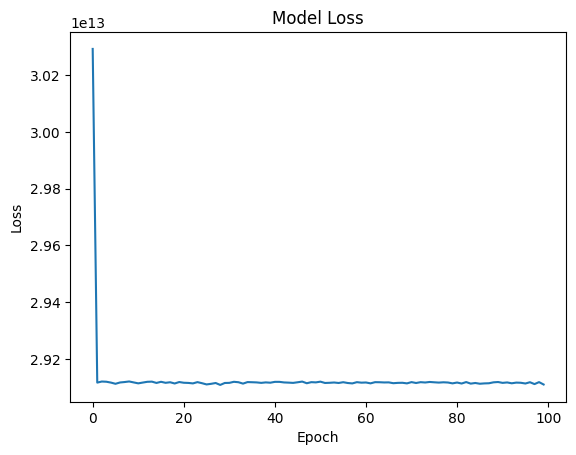

188/188 [==============================] - 0s 882us/step
pred:  [84.7981063]


'\nwith open(coefficient_output_dataroot, \'w\', newline=\'\', encoding="utf-8") as csvfile:\n  writer = csv.writer(csvfile)\n  for row in coefficient_output:\n    writer.writerow(row)\n'

In [2]:
# -*- coding: utf-8 -*-


import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
import csv
import math
import random
import tensorflow as tf


np.random.seed(22)
tf.random.set_seed(22)

training_datalist =  []
testing_datalist =  []
output_datalist =  []
training_dataset = []
validation_dataset = []
y = []
y_val = []
coefficient_output = []



training_dataroot = 'data-10-year-normalized.csv'
# coefficient_output_dataroot = 'model_coefficient.csv'

with open(training_dataroot, newline='') as csvfile:
  training_datalist = np.array(list(csv.reader(csvfile)))


def SplitData():
    global training_dataset, y, training_datalist
    no = {'latitude', 'longitude', 'closing_year'}
    y = np.array([[float(training_datalist[i][-1])] for i in range(1, len(training_datalist))])
    for i in range(1, len(training_datalist)):
        p = []
        for j in range(len(training_datalist[i])-1):
            if training_datalist[i][0] in no:
                pass
            elif training_datalist[i][j] == 'False' or training_datalist[i][j] == 'True' :
                p.append(1. if training_datalist[i][j] == 'True' else 0.)
            else:
                p.append(float(training_datalist[i][j].replace(',','')))
        training_dataset.append(p)
    training_dataset = np.array(training_dataset)

def train_val_split(X, y, val_size, random_state):
    np.random.seed(random_state)
    np.random.shuffle(X)
    np.random.shuffle(y)

    X_train = X[: int(len(X) - val_size)]
    X_val = X[-int(val_size) :]

    y_train = y[: int(len(y) - val_size)]
    y_val = y[-int(val_size) :]
    return X_train, X_val, y_train, y_val


def Training():
    global training_dataset, validation_dataset, y, y_val
    model = tf.keras.Sequential([
        tf.keras.layers.Input(shape=len(training_dataset[0],)),
        tf.keras.layers.Dense(1)
    ])

    model.compile(tf.keras.optimizers.SGD(learning_rate=0.000001), loss='mse')
    history = model.fit(training_dataset, y, epochs=100, verbose=0)

    trained_weights, trained_bias= model.layers[0].get_weights()

    print("Trained Weights:", trained_weights.flatten())
    print("Trained Bias:", trained_bias)

    plt.plot(history.history['loss'])
    plt.title('Model Loss')
    plt.xlabel('Epoch')
    plt.ylabel('Loss')
    plt.show()


    pred = model.predict(validation_dataset)
    print(f'pred: ', sum(map(lambda x, z: abs((z-x)/z), pred, y_val))/len(y_val)*100)


if __name__ == '__main__':
    SplitData()
    training_dataset, validation_dataset, y, y_val = train_val_split(training_dataset, y, 0.1 * len(y), 22)
    Training()



"""
with open(coefficient_output_dataroot, 'w', newline='', encoding="utf-8") as csvfile:
  writer = csv.writer(csvfile)
  for row in coefficient_output:
    writer.writerow(row)
"""
